# Final Project: Non-negative Matrix Facorization Modeling of Research Articiles 

## Introduction

In this first part of the assgiment we will focus on 3 tasks:
1. Exploratory Data Analysis (EDA)
   * Data review
   * Data clean and wrangle
   * Data visualization
2. Model Building and Training
   * Data prep for traning
   * Non-negative Matrix Factorization model training
   * Model validation on test and training data sets
3. Conclustion on analysis

### Import packages and Load Data

In [224]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vetrirah/janatahack-independence-day-2020-ml-hackathon")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/janatahack-independence-day-2020-ml-hackathon


In [225]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import seaborn as sns
import matplotlib.pyplot as plt

import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import make_scorer, balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janatahack-independence-day-2020-ml-hackathon/sample_submission.csv
/kaggle/input/janatahack-independence-day-2020-ml-hackathon/train.csv
/kaggle/input/janatahack-independence-day-2020-ml-hackathon/test.csv
/kaggle/input/npr-data/npr.csv


In [226]:
trainDf = pd.read_csv('/kaggle/input/janatahack-independence-day-2020-ml-hackathon/train.csv')
testDf=pd.read_csv('/kaggle/input/janatahack-independence-day-2020-ml-hackathon/test.csv')
sampleSolDf=pd.read_csv('/kaggle/input/janatahack-independence-day-2020-ml-hackathon/sample_submission.csv')

## Explorartory Data Analysis (EDA)

### Data Review

Let's look at the general data informatoin:

In [227]:
random.choice(trainDfSample.index.values)

13575

In [228]:
def genInfo(df, Category = False):
    print('Data information:')
    print(df.info())
    
    print("\n")
    print('Numbers of null values:')
    print(f'{df.isna().sum()}')

    
    print("\n")
    print('Numbers of duplicates:')
    print("ID:")
    print(f"{df.duplicated(subset=['ID']).sum()}")
    print("TITLE:")
    print(f"{df.duplicated(subset=['TITLE']).sum()}")
    print("ABSTRACT:")
    print(f"{df.duplicated(subset=['ABSTRACT']).sum()}")
    
    print("\n")
    random_number = random.choice(df.index.values)
    print('Sample of a title endery:')
    print(df.loc[random_number,"TITLE"])
    print(f'Note: Text from row {random_number}.')

    print("\n")
    random_number = random.choice(df.index.values)
    print('Sample of a abstract endery:')
    print(df.loc[random_number,"ABSTRACT"])
    print(f'Note: Text from row {random_number}.')

    if Category:
        print("\n")
        print("Count of Categories")
        print(f"{df['Category'].value_counts()}")
    
        print("\n")
        print("Distribution of Categories")
        print(f"{df['Category'].value_counts()/df.shape[0]}")

In [229]:
trainDf

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [230]:
genInfo(trainDf)

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB
None


Numbers of null values:
ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: in

### Data Clean and Wrangle

In [231]:
trainDf['cat_sum'] = trainDf['Computer Science'] + trainDf['Physics'] + trainDf['Mathematics'] + trainDf['Statistics'] + trainDf['Quantitative Biology'] + trainDf['Quantitative Finance']
trainDf[trainDf['cat_sum'] > 1]

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,2
21,22,Many-Body Localization: Stability and Instability,Rare regions with weak disorder (Griffiths r...,0,1,1,0,0,0,2
28,29,Minimax Estimation of the $L_1$ Distance,We consider the problem of estimating the $L...,0,0,1,1,0,0,2
29,30,Density large deviations for multidimensional ...,We investigate the density large deviation f...,0,1,1,0,0,0,2
30,31,mixup: Beyond Empirical Risk Minimization,"Large deep neural networks are powerful, but...",1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
20963,20964,Faithful Inversion of Generative Models for Ef...,Inference amortization methods share informa...,1,0,0,1,0,0,2
20964,20965,A social Network Analysis of the Operations Re...,We study the U.S. Operations Research/Indust...,1,0,0,1,0,0,2
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,2
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,2


In [232]:
trainDfEdit = trainDf[trainDf['cat_sum'] <= 1].copy()
trainDfMults = trainDf[trainDf['cat_sum'] > 1].copy()
# Dealing with multiple categories for one article
for cat in ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']:
    trainDfMultsTemp = trainDfMults[trainDfMults[cat] == 1]
    for cat2 in ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']:
        if cat != cat2:
            trainDfMultsTemp[cat2] = 0
    trainDfEdit = pd.concat([trainDfEdit,trainDfMultsTemp]) 

trainDfEdit

<ipython-input-232-844e17da8a97>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDfMultsTemp[cat2] = 0


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
18912,18913,A bootstrap test to detect prominent Granger-c...,Granger-causality in the frequency domain is...,0,0,0,0,0,1,2
19367,19368,A dynamic network model to measure exposure di...,We propose a statistical model for weighted ...,0,0,0,0,0,1,2
19962,19963,Mean Reverting Portfolios via Penalized OU-Lik...,We study an optimization-based approach to c...,0,0,0,0,0,1,2
20235,20236,How to model fake news,Over the past three years it has become evid...,0,0,0,0,0,1,2


In [233]:
trainDfEdit['cat_sum'] = trainDfEdit['Computer Science'] + trainDfEdit['Physics'] + trainDfEdit['Mathematics'] + trainDfEdit['Statistics'] + trainDfEdit['Quantitative Biology'] + trainDfEdit['Quantitative Finance']
max(trainDfEdit['cat_sum'])

1

In [234]:
trainDfEdit

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
18912,18913,A bootstrap test to detect prominent Granger-c...,Granger-causality in the frequency domain is...,0,0,0,0,0,1,1
19367,19368,A dynamic network model to measure exposure di...,We propose a statistical model for weighted ...,0,0,0,0,0,1,1
19962,19963,Mean Reverting Portfolios via Penalized OU-Lik...,We study an optimization-based approach to c...,0,0,0,0,0,1,1
20235,20236,How to model fake news,Over the past three years it has become evid...,0,0,0,0,0,1,1


In [235]:
trainDfEdit.iloc[:,3:9]

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
5,0,0,1,0,0,0
...,...,...,...,...,...,...
18912,0,0,0,0,0,1
19367,0,0,0,0,0,1
19962,0,0,0,0,0,1
20235,0,0,0,0,0,1


In [236]:
trainDfEdit['Category'] = pd.from_dummies(trainDfEdit.iloc[:,3:9])

In [237]:
genInfo(trainDfEdit, Category=True)

Data information:
<class 'pandas.core.frame.DataFrame'>
Index: 26267 entries, 0 to 20959
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    26267 non-null  int64 
 1   TITLE                 26267 non-null  object
 2   ABSTRACT              26267 non-null  object
 3   Computer Science      26267 non-null  int64 
 4   Physics               26267 non-null  int64 
 5   Mathematics           26267 non-null  int64 
 6   Statistics            26267 non-null  int64 
 7   Quantitative Biology  26267 non-null  int64 
 8   Quantitative Finance  26267 non-null  int64 
 9   cat_sum               26267 non-null  int64 
 10  Category              26267 non-null  object
dtypes: int64(8), object(3)
memory usage: 2.4+ MB
None


Numbers of null values:
ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics      

In [238]:
trainDfSample, testDfSample = train_test_split(trainDfEdit, test_size=0.2, random_state=42)
print(f'Shape of full dataset: {trainDfEdit.shape}')
print(f'Shape of train dataset: {trainDfSample.shape}')
print(f'Shape of test dataset: {testDfSample.shape}')

Shape of full dataset: (26267, 11)
Shape of train dataset: (21013, 11)
Shape of test dataset: (5254, 11)


### Conclusions from Data Review and Data Visualization 

From our intiall data review we have found a few takeways:
1. The data has observations with multiple topics
   * Our solution for such observations is to create a duplicate data entery of the article for each related topic.
2. We split the data into a train and test split.
3. The data is imbalance with large portion of articles related to the topic of Computer Science (32.7%) and a very small group of articles related to Quantitive Finance and Quantitative Biology.
   * We will first use the imbalaced data set as is to model the Non-negative Matrix Factorization.

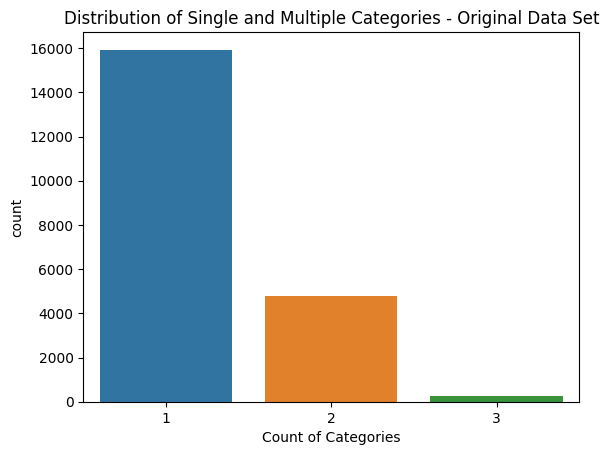

In [239]:
ax = sns.countplot(data=trainDf, x="cat_sum")
ax.set_title("Distribution of Single and Multiple Categories - Original Data Set")
ax.set_xlabel("Count of Categories")
plt.show()

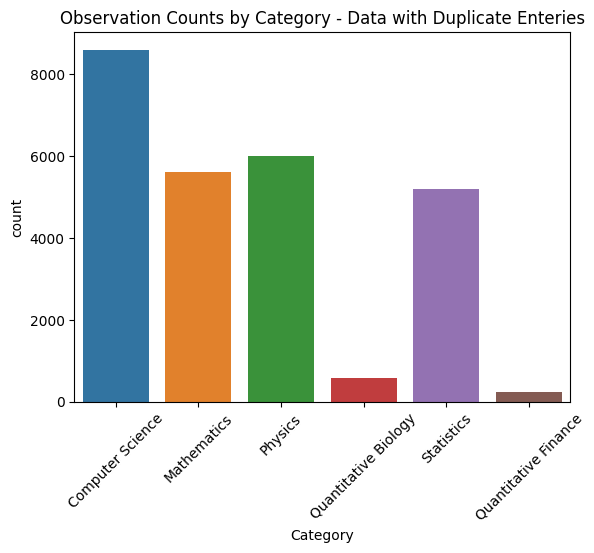

In [240]:
sns.countplot(data=trainDfEdit, x="Category")
plt.title("Observation Counts by Category - Data with Duplicate Enteries")
plt.xticks(rotation=45)
plt.show()

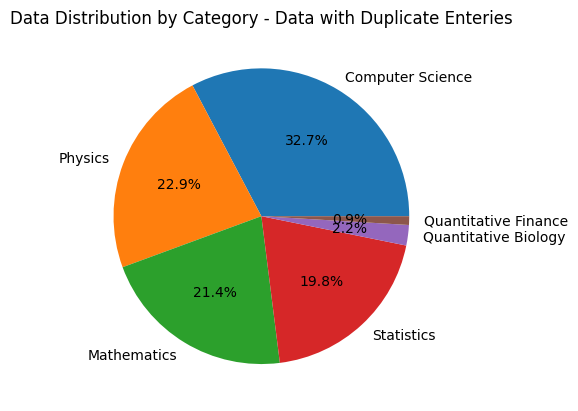

In [241]:
plt.pie(trainDfEdit['Category'].value_counts().values,
       labels = trainDfEdit['Category'].value_counts().index,
       autopct = '%1.1f%%')
plt.title("Data Distribution by Category - Data with Duplicate Enteries")
plt.show()

## Model Build and Traning

### Data Prep for Training 

Next, let's pre-process the text data with the following steps:
1. Use the Spacy library to prep the text data for model training
2. Data Visualization of Words by article topic
3. Vectorize the clean text data

In [242]:
trainDfSample['TitleAbstract'] = trainDfSample['TITLE'] + " " + trainDfSample['ABSTRACT']

In [243]:
nlp = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "ner"])

def token_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc 
                     if not token.is_stop 
                     and not token.is_punct
                     and not token.is_space]
    return tokens
    
def clean_text(df):
    df['Tokens'] = df['TitleAbstract'].apply(token_text)
    df['Clean_text'] = df['Tokens'].apply(lambda x: ' '.join(x))

    return df

In [244]:
trainDfSample = clean_text(trainDfSample)
trainDfSample

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum,Category,TitleAbstract,Tokens,Clean_text
14632,14633,Chemical dynamics between wells across a time-...,"In chemical or physical reaction dynamics, i...",0,1,0,0,0,0,1,Physics,Chemical dynamics between wells across a time-...,"[chemical, dynamics, wells, time, dependent, b...",chemical dynamics wells time dependent barrier...
2977,2978,Markov Models for Health Economic Evaluations:...,Health economic evaluation studies are widel...,0,0,0,1,0,0,1,Statistics,Markov Models for Health Economic Evaluations:...,"[markov, models, health, economic, evaluations...",markov models health economic evaluations r pa...
4144,4145,Long-term Blood Pressure Prediction with Deep ...,Existing methods for arterial blood pressure...,0,0,0,1,0,0,1,Statistics,Long-term Blood Pressure Prediction with Deep ...,"[long, term, blood, pressure, prediction, deep...",long term blood pressure prediction deep recur...
1874,1875,An Oracle Property of The Nadaraya-Watson Kern...,The celebrated Nadaraya-Watson kernel estima...,0,0,0,1,0,0,1,Statistics,An Oracle Property of The Nadaraya-Watson Kern...,"[oracle, property, nadaraya, watson, kernel, e...",oracle property nadaraya watson kernel estimat...
18123,18124,Transport signatures of topological supercondu...,We study the conductance of a junction betwe...,0,1,0,0,0,0,1,Physics,Transport signatures of topological supercondu...,"[transport, signatures, topological, supercond...",transport signatures topological superconducti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,10923,Front interaction induces excitable behavior,Spatially extended systems can support local...,0,0,1,0,0,0,1,Mathematics,Front interaction induces excitable behavior ...,"[interaction, induces, excitable, behavior, sp...",interaction induces excitable behavior spatial...
7165,7166,A Density Result for Real Hyperelliptic Curves,"Let $\{\infty^+, \infty^-\}$ be the two poin...",0,0,1,0,0,0,1,Mathematics,A Density Result for Real Hyperelliptic Curves...,"[density, result, real, hyperelliptic, curves,...",density result real hyperelliptic curves let $...
1116,1117,Stacco: Differentially Analyzing Side-Channel ...,Intel Software Guard Extension (SGX) offers ...,1,0,0,0,0,0,1,Computer Science,Stacco: Differentially Analyzing Side-Channel ...,"[stacco, differentially, analyzing, channel, t...",stacco differentially analyzing channel traces...
20778,20779,Dynamical Exploration of Amplitude Bistability...,"Nonlinear systems, whose outputs are not dir...",0,1,0,0,0,0,1,Physics,Dynamical Exploration of Amplitude Bistability...,"[dynamical, exploration, amplitude, bistabilit...",dynamical exploration amplitude bistability en...


Text(0.5, 1.0, 'Word Count by Category')

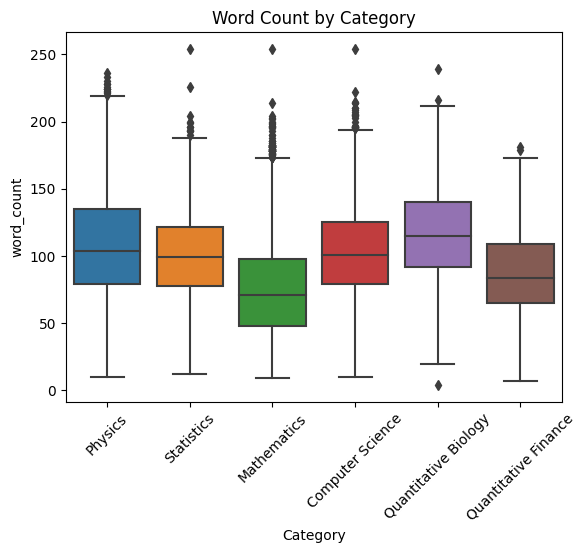

In [245]:
# Count the number of words in each article
trainDfSample['word_count'] = trainDfSample['Tokens'].apply(lambda x: len(x))

sns.boxplot(data = trainDfSample, x = 'Category', y = 'word_count')
plt.xticks(rotation=45)
plt.title('Word Count by Category')

In [246]:
# Create a CountVectorizer
countVectorizer = CountVectorizer()
wordCountMatrix = countVectorizer.fit_transform(trainDfSample['Clean_text'])

wordCountDf = pd.DataFrame(wordCountMatrix.toarray(), columns = countVectorizer.get_feature_names_out(),
                   index = trainDfSample['Category'])

wordCounts = wordCountDf.groupby('Category').sum()
wordCounts = wordCounts.reset_index()
wordCounts

,Category,00,000,000001,0000029,00001,00002407,0001,0001s,0004,...,δu,λy,μ_,μecog,μm,π_1,π_4,σ_,σ_2,φ_0
0,Computer Science,3,81,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mathematics,0,6,1,0,0,1,0,0,0,...,1,1,0,0,0,2,1,2,1,0
2,Physics,7,68,0,1,0,0,16,1,1,...,0,0,1,0,3,0,0,0,0,1
3,Quantitative Biology,1,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Quantitative Finance,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Statistics,0,49,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


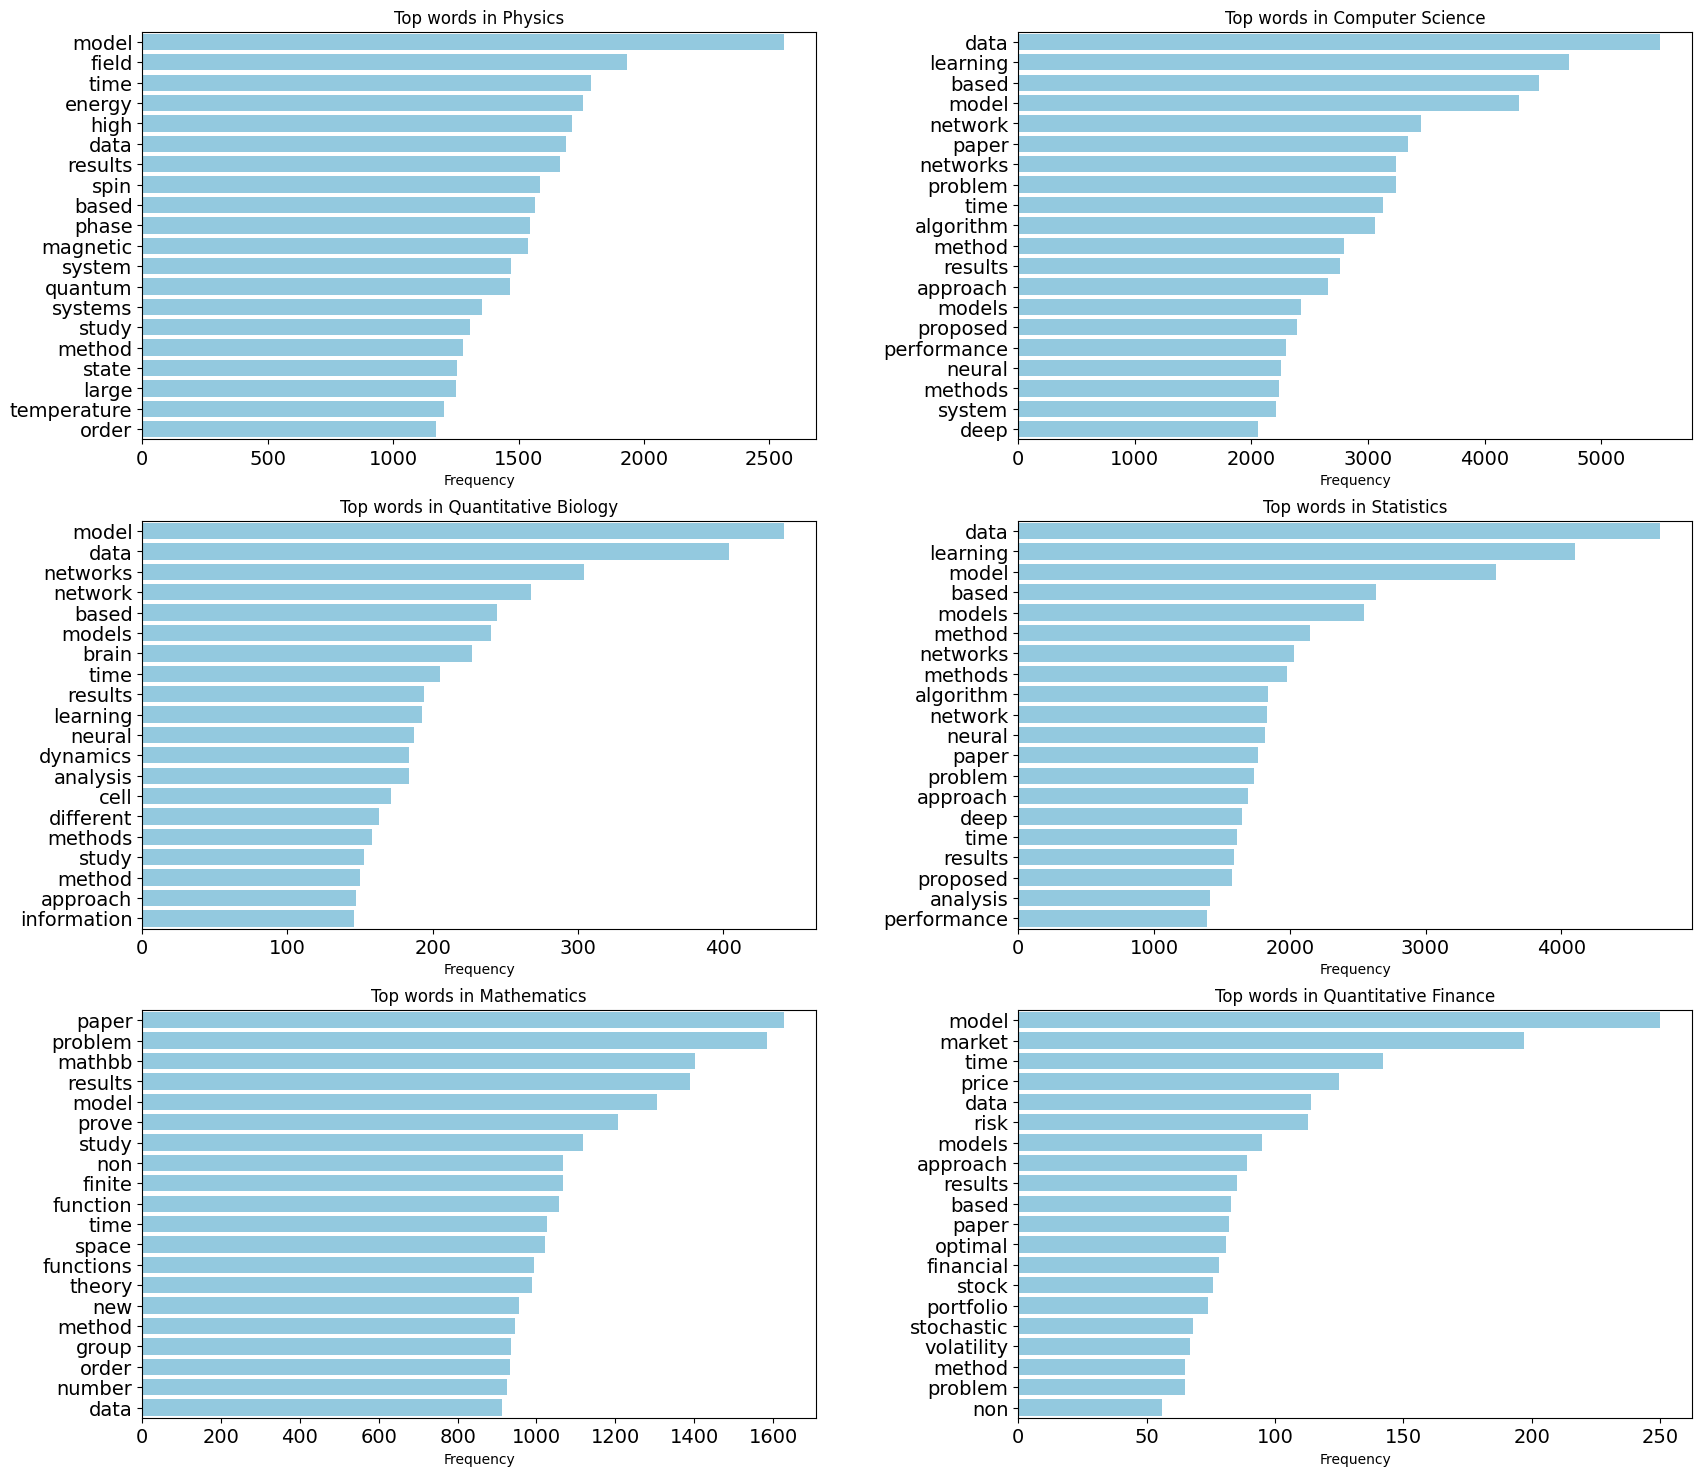

In [247]:
# Plot top words for each category
def plotTopWords( n, category, ax):
    df = wordCounts[wordCounts['Category'] == category].drop('Category', axis = 1).T
    df.columns = ['Frequency']
    df = df.sort_values(by = 'Frequency', ascending = False).head(n)

    sns.barplot(x = df['Frequency'], y = df.index, color = 'skyblue', ax = ax)
    ax.set_title(f'Top words in {category}')
    ax.set_ylabel('')
    ax.tick_params(axis='both', labelsize=14)
    
    return ax

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 18))
plt.subplots_adjust(wspace = 0.3)
for i, category in enumerate(trainDfSample['Category'].unique()):
    plotTopWords( 20, category, ax[i%3,i%2])

In [248]:
vectorizer = TfidfVectorizer()
vecTrain = vectorizer.fit_transform(trainDfSample['Clean_text'])

print(vecTrain.shape)

(21013, 51235)


### Non-negative Matrix Factorization model training

Next, let's do model training: 
1. We'll use Non-negative Matrix Factorization (NMF) to model the data
2. We'll use the NMF model to get predictions on the train dataset
3. We'll map the predicted index to the actual categories

In [249]:
num_cat = len(trainDfSample['Category'].unique())
nmf = NMF(n_components = num_cat)
trainNmf = nmf.fit_transform(vecTrain)

print(trainNmf.shape)

(21013, 6)


In [250]:
trainDfSample["Prediction"] = trainNmf.argmax(axis=1)
trainDfSample

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum,Category,TitleAbstract,Tokens,Clean_text,word_count,Prediction
14632,14633,Chemical dynamics between wells across a time-...,"In chemical or physical reaction dynamics, i...",0,1,0,0,0,0,1,Physics,Chemical dynamics between wells across a time-...,"[chemical, dynamics, wells, time, dependent, b...",chemical dynamics wells time dependent barrier...,140,2
2977,2978,Markov Models for Health Economic Evaluations:...,Health economic evaluation studies are widel...,0,0,0,1,0,0,1,Statistics,Markov Models for Health Economic Evaluations:...,"[markov, models, health, economic, evaluations...",markov models health economic evaluations r pa...,70,0
4144,4145,Long-term Blood Pressure Prediction with Deep ...,Existing methods for arterial blood pressure...,0,0,0,1,0,0,1,Statistics,Long-term Blood Pressure Prediction with Deep ...,"[long, term, blood, pressure, prediction, deep...",long term blood pressure prediction deep recur...,174,3
1874,1875,An Oracle Property of The Nadaraya-Watson Kern...,The celebrated Nadaraya-Watson kernel estima...,0,0,0,1,0,0,1,Statistics,An Oracle Property of The Nadaraya-Watson Kern...,"[oracle, property, nadaraya, watson, kernel, e...",oracle property nadaraya watson kernel estimat...,121,0
18123,18124,Transport signatures of topological supercondu...,We study the conductance of a junction betwe...,0,1,0,0,0,0,1,Physics,Transport signatures of topological supercondu...,"[transport, signatures, topological, supercond...",transport signatures topological superconducti...,89,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,10923,Front interaction induces excitable behavior,Spatially extended systems can support local...,0,0,1,0,0,0,1,Mathematics,Front interaction induces excitable behavior ...,"[interaction, induces, excitable, behavior, sp...",interaction induces excitable behavior spatial...,78,2
7165,7166,A Density Result for Real Hyperelliptic Curves,"Let $\{\infty^+, \infty^-\}$ be the two poin...",0,0,1,0,0,0,1,Mathematics,A Density Result for Real Hyperelliptic Curves...,"[density, result, real, hyperelliptic, curves,...",density result real hyperelliptic curves let $...,57,1
1116,1117,Stacco: Differentially Analyzing Side-Channel ...,Intel Software Guard Extension (SGX) offers ...,1,0,0,0,0,0,1,Computer Science,Stacco: Differentially Analyzing Side-Channel ...,"[stacco, differentially, analyzing, channel, t...",stacco differentially analyzing channel traces...,183,2
20778,20779,Dynamical Exploration of Amplitude Bistability...,"Nonlinear systems, whose outputs are not dir...",0,1,0,0,0,0,1,Physics,Dynamical Exploration of Amplitude Bistability...,"[dynamical, exploration, amplitude, bistabilit...",dynamical exploration amplitude bistability en...,102,2


In [251]:
result = trainDfSample[['ID','Category','Prediction']].groupby(['Category','Prediction']).count().reset_index()
result = result.loc[result[['Prediction','ID']].groupby(['Prediction']).idxmax().reset_index()['ID']]
result

,Category,Prediction,ID
30,Statistics,0,1431
7,Mathematics,1,2959
14,Physics,2,3865
3,Computer Science,3,2009
4,Computer Science,4,742
5,Computer Science,5,1584


In [252]:
cat_map = result[['Prediction','Category']].set_index('Prediction').to_dict()['Category']
cat_map

{0: 'Statistics',
 1: 'Mathematics',
 2: 'Physics',
 3: 'Computer Science',
 4: 'Computer Science',
 5: 'Computer Science'}

In [253]:
trainDfSample['Prediction_category'] = trainDfSample['Prediction'].map(cat_map)
trainDfSample

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum,Category,TitleAbstract,Tokens,Clean_text,word_count,Prediction,Prediction_category
14632,14633,Chemical dynamics between wells across a time-...,"In chemical or physical reaction dynamics, i...",0,1,0,0,0,0,1,Physics,Chemical dynamics between wells across a time-...,"[chemical, dynamics, wells, time, dependent, b...",chemical dynamics wells time dependent barrier...,140,2,Physics
2977,2978,Markov Models for Health Economic Evaluations:...,Health economic evaluation studies are widel...,0,0,0,1,0,0,1,Statistics,Markov Models for Health Economic Evaluations:...,"[markov, models, health, economic, evaluations...",markov models health economic evaluations r pa...,70,0,Statistics
4144,4145,Long-term Blood Pressure Prediction with Deep ...,Existing methods for arterial blood pressure...,0,0,0,1,0,0,1,Statistics,Long-term Blood Pressure Prediction with Deep ...,"[long, term, blood, pressure, prediction, deep...",long term blood pressure prediction deep recur...,174,3,Computer Science
1874,1875,An Oracle Property of The Nadaraya-Watson Kern...,The celebrated Nadaraya-Watson kernel estima...,0,0,0,1,0,0,1,Statistics,An Oracle Property of The Nadaraya-Watson Kern...,"[oracle, property, nadaraya, watson, kernel, e...",oracle property nadaraya watson kernel estimat...,121,0,Statistics
18123,18124,Transport signatures of topological supercondu...,We study the conductance of a junction betwe...,0,1,0,0,0,0,1,Physics,Transport signatures of topological supercondu...,"[transport, signatures, topological, supercond...",transport signatures topological superconducti...,89,2,Physics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,10923,Front interaction induces excitable behavior,Spatially extended systems can support local...,0,0,1,0,0,0,1,Mathematics,Front interaction induces excitable behavior ...,"[interaction, induces, excitable, behavior, sp...",interaction induces excitable behavior spatial...,78,2,Physics
7165,7166,A Density Result for Real Hyperelliptic Curves,"Let $\{\infty^+, \infty^-\}$ be the two poin...",0,0,1,0,0,0,1,Mathematics,A Density Result for Real Hyperelliptic Curves...,"[density, result, real, hyperelliptic, curves,...",density result real hyperelliptic curves let $...,57,1,Mathematics
1116,1117,Stacco: Differentially Analyzing Side-Channel ...,Intel Software Guard Extension (SGX) offers ...,1,0,0,0,0,0,1,Computer Science,Stacco: Differentially Analyzing Side-Channel ...,"[stacco, differentially, analyzing, channel, t...",stacco differentially analyzing channel traces...,183,2,Physics
20778,20779,Dynamical Exploration of Amplitude Bistability...,"Nonlinear systems, whose outputs are not dir...",0,1,0,0,0,0,1,Physics,Dynamical Exploration of Amplitude Bistability...,"[dynamical, exploration, amplitude, bistabilit...",dynamical exploration amplitude bistability en...,102,2,Physics


### Model Validation

Next, let's do model performance: 
1. We'll look at the confusion matrix on the training set
2. We'll look at the model accuracy on the training set
3. We'll look at the model accuracy on the test set

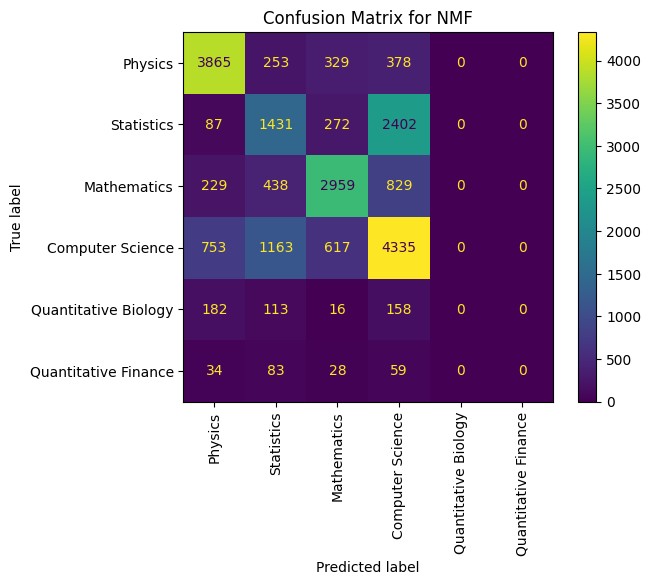

In [254]:
confMat = confusion_matrix(trainDfSample["Category"], trainDfSample["Prediction_category"], labels=list(trainDfSample["Category"].unique()))

disp = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=list(trainDfSample["Category"].unique()) )
disp.plot(xticks_rotation=90)
plt.title('Confusion Matrix for NMF')
plt.show()

In [255]:
print(f"The model accuracy on the traning data set is: {accuracy_score(trainDfSample['Category'], trainDfSample['Prediction_category']):.2%} .")

The model accuracy on the traning data set is: 59.92% .


In [256]:
testDfSample['TitleAbstract'] = testDfSample['TITLE'] + " " + testDfSample['ABSTRACT']
testDfSample = clean_text(testDfSample)
testDfSample

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum,Category,TitleAbstract,Tokens,Clean_text
14508,14509,Reduced Modeling of Unknown Trajectories,This paper deals with model order reduction ...,0,0,0,1,0,0,1,Statistics,Reduced Modeling of Unknown Trajectories Thi...,"[reduced, modeling, unknown, trajectories, pap...",reduced modeling unknown trajectories paper de...
13625,13626,Self-Repairing Energy Materials: Sine Qua Non ...,Materials are central to our way of life and...,0,1,0,0,0,0,1,Physics,Self-Repairing Energy Materials: Sine Qua Non ...,"[self, repairing, energy, materials, sine, qua...",self repairing energy materials sine qua non s...
10772,10773,Analog Experiments on Tensile Strength of Dust...,The tensile strength of small dusty bodies i...,0,1,0,0,0,0,1,Physics,Analog Experiments on Tensile Strength of Dust...,"[analog, experiments, tensile, strength, dusty...",analog experiments tensile strength dusty come...
7668,7669,Note on the geodesic Monte Carlo,Geodesic Monte Carlo (gMC) is a powerful alg...,0,0,0,1,0,0,1,Statistics,Note on the geodesic Monte Carlo Geodesic Mo...,"[note, geodesic, monte, carlo, geodesic, monte...",note geodesic monte carlo geodesic monte carlo...
11787,11788,Hamiltonian approach to slip-stacking dynamics,Hamiltonian dynamics has been applied to stu...,0,1,0,0,0,0,1,Physics,Hamiltonian approach to slip-stacking dynamics...,"[hamiltonian, approach, slip, stacking, dynami...",hamiltonian approach slip stacking dynamics ha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,15192,Maximizing the Mutual Information of Multi-Ant...,Single-user multiple-input / multiple-output...,1,0,0,0,0,0,1,Computer Science,Maximizing the Mutual Information of Multi-Ant...,"[maximizing, mutual, information, multi, anten...",maximizing mutual information multi antenna li...
19347,19348,Spread of hate speech in online social media,The present online social media platform is ...,1,0,0,0,0,0,1,Computer Science,Spread of hate speech in online social media ...,"[spread, hate, speech, online, social, media, ...",spread hate speech online social media present...
16541,16542,QAOA for Max-Cut requires hundreds of qubits f...,Computational quantum technologies are enter...,1,0,0,0,0,0,1,Computer Science,QAOA for Max-Cut requires hundreds of qubits f...,"[qaoa, max, cut, requires, hundreds, qubits, q...",qaoa max cut requires hundreds qubits quantum ...
6077,6078,Catalyzed bimolecular reactions in responsive ...,We describe a general theory for surface-cat...,0,1,0,0,0,0,1,Physics,Catalyzed bimolecular reactions in responsive ...,"[catalyzed, bimolecular, reactions, responsive...",catalyzed bimolecular reactions responsive nan...


In [257]:
vecTest = vectorizer.transform(testDfSample['Clean_text'])

In [260]:
testDfSample["Prediction"] = nmf.transform(vecTest).argmax(axis=1)
testDfSample['Prediction_category'] = testDfSample['Prediction'].map(cat_map)
testDfSample

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,cat_sum,Category,TitleAbstract,Tokens,Clean_text,Prediction,Prediction_category
14508,14509,Reduced Modeling of Unknown Trajectories,This paper deals with model order reduction ...,0,0,0,1,0,0,1,Statistics,Reduced Modeling of Unknown Trajectories Thi...,"[reduced, modeling, unknown, trajectories, pap...",reduced modeling unknown trajectories paper de...,0,Statistics
13625,13626,Self-Repairing Energy Materials: Sine Qua Non ...,Materials are central to our way of life and...,0,1,0,0,0,0,1,Physics,Self-Repairing Energy Materials: Sine Qua Non ...,"[self, repairing, energy, materials, sine, qua...",self repairing energy materials sine qua non s...,2,Physics
10772,10773,Analog Experiments on Tensile Strength of Dust...,The tensile strength of small dusty bodies i...,0,1,0,0,0,0,1,Physics,Analog Experiments on Tensile Strength of Dust...,"[analog, experiments, tensile, strength, dusty...",analog experiments tensile strength dusty come...,2,Physics
7668,7669,Note on the geodesic Monte Carlo,Geodesic Monte Carlo (gMC) is a powerful alg...,0,0,0,1,0,0,1,Statistics,Note on the geodesic Monte Carlo Geodesic Mo...,"[note, geodesic, monte, carlo, geodesic, monte...",note geodesic monte carlo geodesic monte carlo...,5,Computer Science
11787,11788,Hamiltonian approach to slip-stacking dynamics,Hamiltonian dynamics has been applied to stu...,0,1,0,0,0,0,1,Physics,Hamiltonian approach to slip-stacking dynamics...,"[hamiltonian, approach, slip, stacking, dynami...",hamiltonian approach slip stacking dynamics ha...,2,Physics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,15192,Maximizing the Mutual Information of Multi-Ant...,Single-user multiple-input / multiple-output...,1,0,0,0,0,0,1,Computer Science,Maximizing the Mutual Information of Multi-Ant...,"[maximizing, mutual, information, multi, anten...",maximizing mutual information multi antenna li...,5,Computer Science
19347,19348,Spread of hate speech in online social media,The present online social media platform is ...,1,0,0,0,0,0,1,Computer Science,Spread of hate speech in online social media ...,"[spread, hate, speech, online, social, media, ...",spread hate speech online social media present...,4,Computer Science
16541,16542,QAOA for Max-Cut requires hundreds of qubits f...,Computational quantum technologies are enter...,1,0,0,0,0,0,1,Computer Science,QAOA for Max-Cut requires hundreds of qubits f...,"[qaoa, max, cut, requires, hundreds, qubits, q...",qaoa max cut requires hundreds qubits quantum ...,2,Physics
6077,6078,Catalyzed bimolecular reactions in responsive ...,We describe a general theory for surface-cat...,0,1,0,0,0,0,1,Physics,Catalyzed bimolecular reactions in responsive ...,"[catalyzed, bimolecular, reactions, responsive...",catalyzed bimolecular reactions responsive nan...,2,Physics


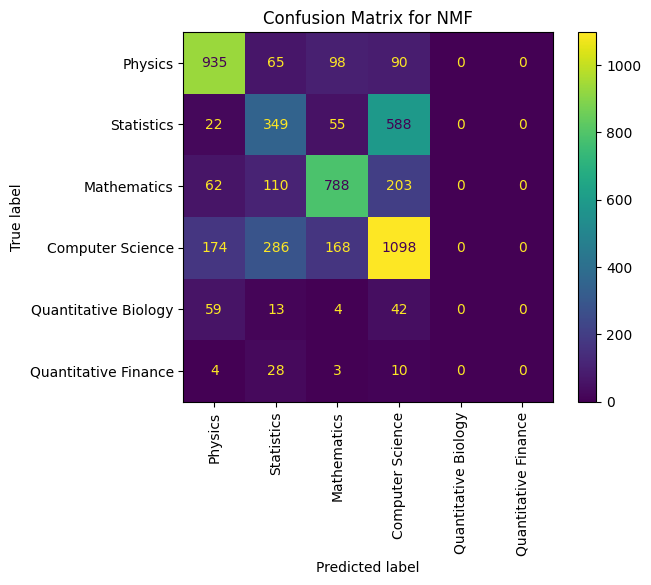

In [261]:
confMat = confusion_matrix(testDfSample["Category"], testDfSample["Prediction_category"], labels=list(trainDfSample["Category"].unique()))

disp = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=list(trainDfSample["Category"].unique()) )
disp.plot(xticks_rotation=90)
plt.title('Confusion Matrix for NMF')
plt.show()

In [262]:
print(f"The model accuracy on the test data set is: {accuracy_score(testDfSample['Category'], testDfSample['Prediction_category']):.2%} .")

The model accuracy on the test data set is: 60.33% .
